# Importing Necessary Libraries

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
# Import the os module to interact with the operating system
import os

*Task 1 : Merging a 12 months of sales data into a single CSV file*

In [ ]:
# Read the csv file into a dataframe
df = pd.read_csv("Sales_Data/Sales_April_2019.csv", encoding='unicode_escape')

files = [file for file in os.listdir("Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
   
all_months_data.to_csv("all_data.csv", index=False)

# Read in Updated  Dataframe

In [206]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleanup the data

*Drop rows of Nan*

In [207]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


*Find 'Or' and delete it*

In [208]:
all_data = all_data[all_data['Order Date'].str[0:2]!= 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


*Convert columns to the correct type*

In [209]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Making integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Making Float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional column

*Task 2 : Add montth column*

In [210]:
all_data['months'] = all_data['Order Date'].str[0:2]
all_data['months'] = all_data['months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3 : add a sales  column

In [211]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4 : Add a city  column

In [212]:
# lets use the .apply() method 
# define a function to get the city from the address
def get_city(address):
    return address.split(',')[1]
# define a function to get the state from the address
def get_state(address):
    return address.split(',')[2].split(' ')[1]
# apply the get_city() function to the 'Purchase Address' column and store the result in the 'City' column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f" {get_city(x)} ({get_state(x)})")
# display the first 5 rows of the dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question #1: What was the best month for sales? How much was earned that month?

In [213]:
results = all_data.groupby('months').sum()['Sales']
results

months
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

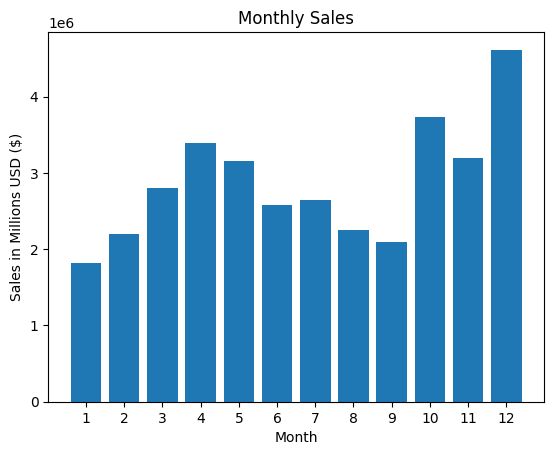

In [214]:
import matplotlib.pyplot as plt

Month = range(1, 13)
plt.bar(Month, results)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales in Millions USD ($)')
plt.xticks(Month)
plt.show()

#### Question 2 What city had the highest number of sales?

In [215]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


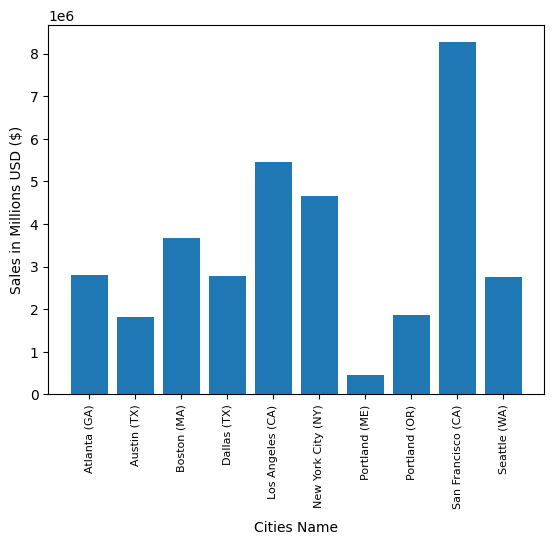

In [216]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities , rotation='vertical', size=8)
plt.xlabel('Cities Name')
plt.ylabel('Sales in Millions USD ($)')
plt.show()

#### Question 3 What time should we display advertisements to maximize the likelihood of purchases?

In [217]:
all_data['Date and Time'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Date and Time'].dt.hour
all_data['Minute'] = all_data['Date and Time'].dt.minute
all_data.head()

C:\Users\Suhel Edrisi\AppData\Local\Temp\ipykernel_13144\564384902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date and Time'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City,Date and Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27


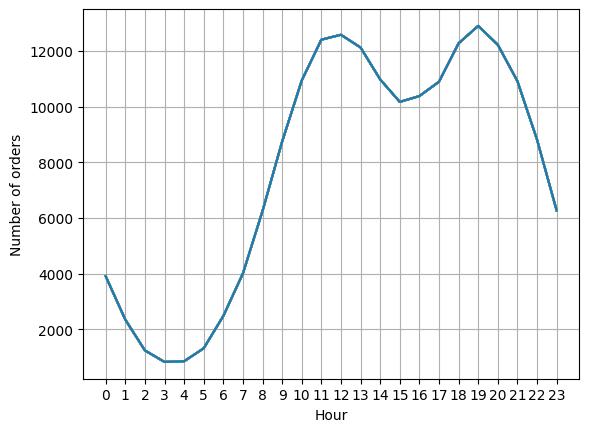

In [218]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# My recommmendation is around 11am (11) and 7pm (19)

#### Question 4 : What products are most often sold together?

In [219]:
# What products are most often sold together?
# Select rows where 'Order ID' is duplicated
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# Display the first 10 rows of the dataframe
df.head()
# Group by 'Order ID' and join 'Product' values into a single string
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Drop duplicates based on 'Order ID' and 'Grouped' columns
df = df[['Order ID', 'Grouped']].drop_duplicates()
# Display the dataframe
df.head()

C:\Users\Suhel Edrisi\AppData\Local\Temp\ipykernel_13144\1685377431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [220]:
from itertools import combinations
from collections import Counter
count = Counter()
# Iterate through each row in the 'Grouped' column of the dataframe
for row in df['Grouped']:
    #Split each row into a list of strings
    row_list = row.split(',')
    #Update the Counter object with the combinations of 2 strings from each list
    count.update(Counter(combinations(row_list, 2)))
#Return the most common combinations
count.most_common()
for key,value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

In [221]:
# Drop Date and Time columns
all_data.drop(['Date and Time'], axis=1,inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Question 5: What product sold the most? Why do you think it sold the most?

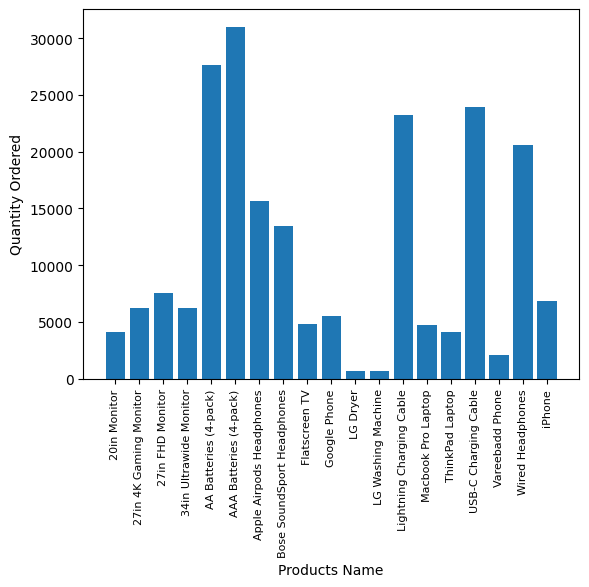

In [ ]:
product_group = all_data.groupby('Product')
quantiy_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.bar(products,quantiy_ordered)
plt.xticks(products , rotation='vertical', size=8)
plt.xlabel('Products Name')
plt.ylabel('Quantity Ordered')
plt.show()


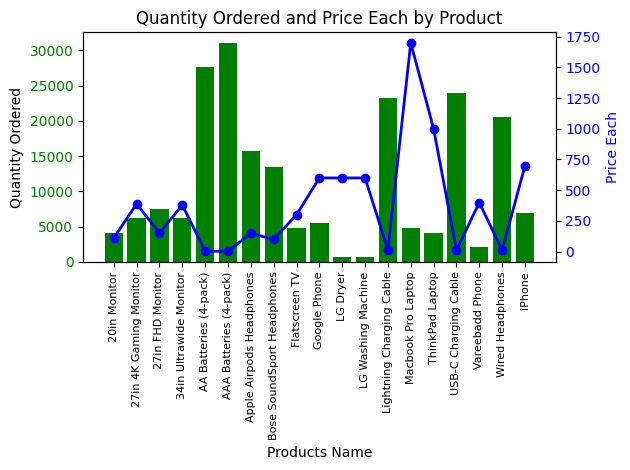


The most sold product is AAA Batteries (4-pack) with price 2.99 and quantity sold 31017


C:\Users\Suhel Edrisi\AppData\Local\Temp\ipykernel_13144\840815392.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The most sold product is',products[quantiy_ordered.argmax()] ,'with price',prices[quantiy_ordered.argmax()],'and quantity sold',quantiy_ordered.max())


In [238]:
# Group the data by 'Product' and calculate the mean of 'Price Each'
prices = all_data.groupby('Product')['Price Each'].mean()
# Create a figure and a set of subplots
fig,ax1 = plt.subplots()
# Create a bar chart of 'Quantity Ordered' by 'Product'
ax1.bar(products,quantiy_ordered,color='g')
# Set the x-axis label
ax1.set_xlabel('Products Name')
# Set the y-axis label
ax1.set_ylabel('Quantity Ordered')
# Set the color of the y-axis labels
ax1.tick_params(axis='y', labelcolor='g')
# Set the rotation and size of the x-axis labels
plt.xticks(products , rotation='vertical', size=8)
# Set the title of the plot
plt.title('Quantity Ordered and Price Each by Product')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Create a line chart of 'Price Each' by 'Product'
ax2.plot(prices.index, prices, color='b', marker='o', linewidth=2)
# Set the y-axis label of the second y-axis
ax2.set_ylabel('Price Each', color='b')
# Set the color of the y-axis labels of the second y-axis
ax2.tick_params(axis='y', labelcolor='b')
# Adjust the layout of the plot
plt.tight_layout()
# Display the plot
plt.show()
print()
# Printing the most sold product and its price also the quantity sold
print('The most sold product is',products[quantiy_ordered.argmax()] ,'with price',prices[quantiy_ordered.argmax()],'and quantity sold',quantiy_ordered.max())